# Gauss-Newton

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pt
import scipy.linalg as la

We would like to fit the model $f(t) = x_0 e^{x_1 t}$ to the following data using Gauss-Newton:

In [13]:
t = np.array([0.0, 1.0, 2.0, 3.0])
y = np.array([2.0, 0.7, 0.3, 0.1])

First, define a residual function (as a function of $\mathbf x=(x_0, x_1)$)

In [14]:
def residual(x):
    return y - x[0] * np.exp(x[1] * t)

Next, define its Jacobian matrix:

In [15]:
#clear
def jacobian(x):
    return np.array([
        -np.exp(x[1] * t),
        -x[0] * t * np.exp(x[1] * t)
        ]).T

Here are two initial guesses. Try both:

In [56]:
#x = np.array([1, 0])
x = np.array([0.4, 2])

Here's a plotting function to judge the quality of our guess:

Residual norm: 162.72704101675862


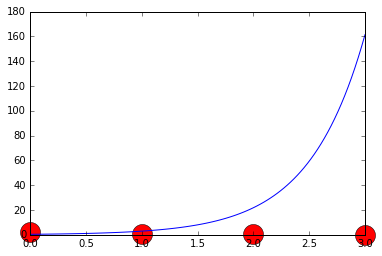

In [57]:
def plot_guess(x):
    pt.plot(t, y, 'ro', markersize=20, clip_on=False)
    T = np.linspace(t.min(), t.max(), 100)
    Y = x[0] * np.exp(x[1] * T)
    pt.plot(T, Y, 'b-')
    
    print("Residual norm:", la.norm(residual(x), 2))

plot_guess(x)

Code up one iteration of Gauss-Newton. Use `numpy.linalg.lstsq()` to solve the least-squares problem, noting that that function returns a tuple--the first entry of which is the desired solution.

Also print the residual norm. Use `plot_iterate` to visualize the current guess.

Then evaluate this cell in-place many times (Ctrl-Enter):

Residual norm: 0.044677532987197045


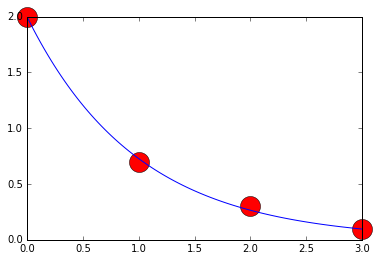

In [79]:
x = x + la.lstsq(jacobian(x), -residual(x))[0]

plot_guess(x)